In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
reddit = pd.read_csv("reddit_comments.csv")
reddit.index = reddit['Unnamed: 0']
reddit.index.names = ['Date']
reddit.drop("Unnamed: 0", axis=1, inplace=True)
reddit.head()

,iphone,galaxy,htc,lg,pixel,iphone galaxy,iphone htc,iphone lg,iphone pixel,galaxy htc,galaxy lg,galaxy pixel,htc lg,htc pixel,lg pixel
Date,,,,,,,,,,,,,,,
2016-09-04,5125.0,833.0,965.0,582.0,1877.0,210.0,131.0,67.0,370.0,80.0,43.0,82.0,89.0,156.0,59.0
2016-09-11,3163.0,575.0,596.0,470.0,1352.0,139.0,96.0,57.0,172.0,50.0,35.0,59.0,68.0,100.0,41.0
2016-09-18,5917.0,1742.0,1802.0,1189.0,4853.0,554.0,316.0,193.0,1576.0,109.0,100.0,348.0,207.0,477.0,244.0
2016-09-25,3703.0,1562.0,849.0,1042.0,3139.0,239.0,129.0,121.0,573.0,72.0,69.0,133.0,116.0,199.0,187.0
2016-10-02,3384.0,746.0,702.0,791.0,3384.0,135.0,107.0,74.0,657.0,39.0,41.0,136.0,54.0,224.0,118.0


In [3]:
r_cols = reddit.columns

In [4]:
r_means = reddit.mean(axis=0)
r_stds = reddit.std(axis=0)

In [22]:
total_week_means = reddit.mean(axis=1)
total_week_std = reddit.std(axis=1)
co_week_means = reddit[r_cols[5:]].mean(axis=1)
co_week_std = reddit[r_cols[5:]].std(axis=1)
ind_week_means = reddit[r_cols[:5]].mean(axis=1)
ind_week_std = reddit[r_cols[:5]].std(axis=1)

week_inds = range(69)

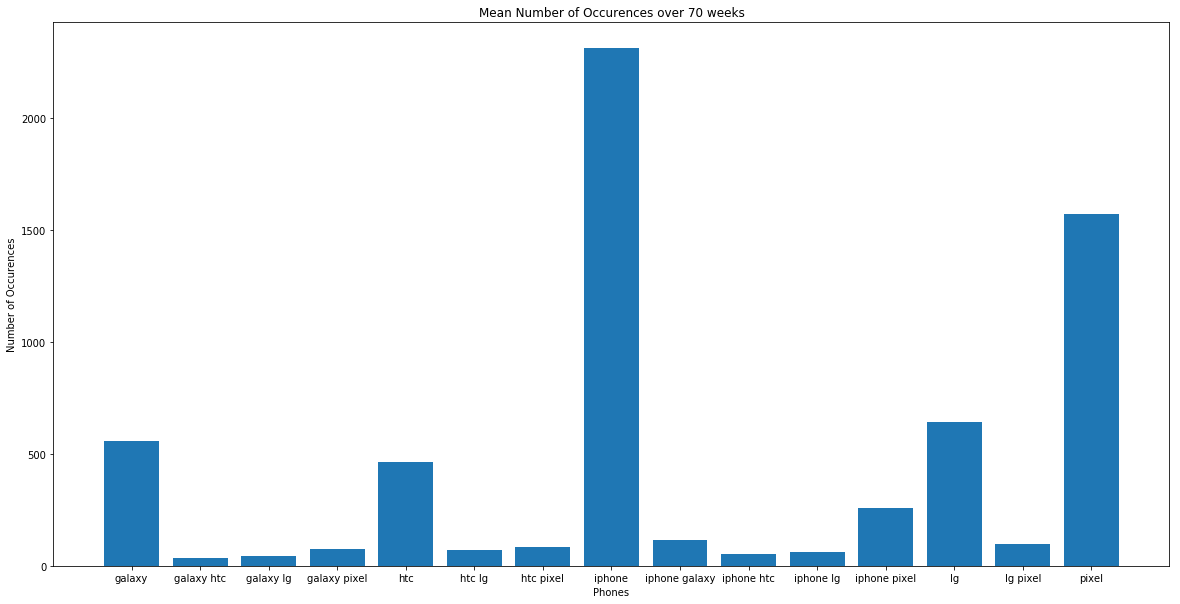

In [56]:
plt.figure(figsize=(20,10))
plt.bar(r_cols, r_means)
plt.ylabel('Number of Occurences')
plt.xlabel("Phones")
plt.title("Mean Number of Occurences over 70 weeks")
plt.savefig("reddit_col_means_bar.jpg")
plt.show()

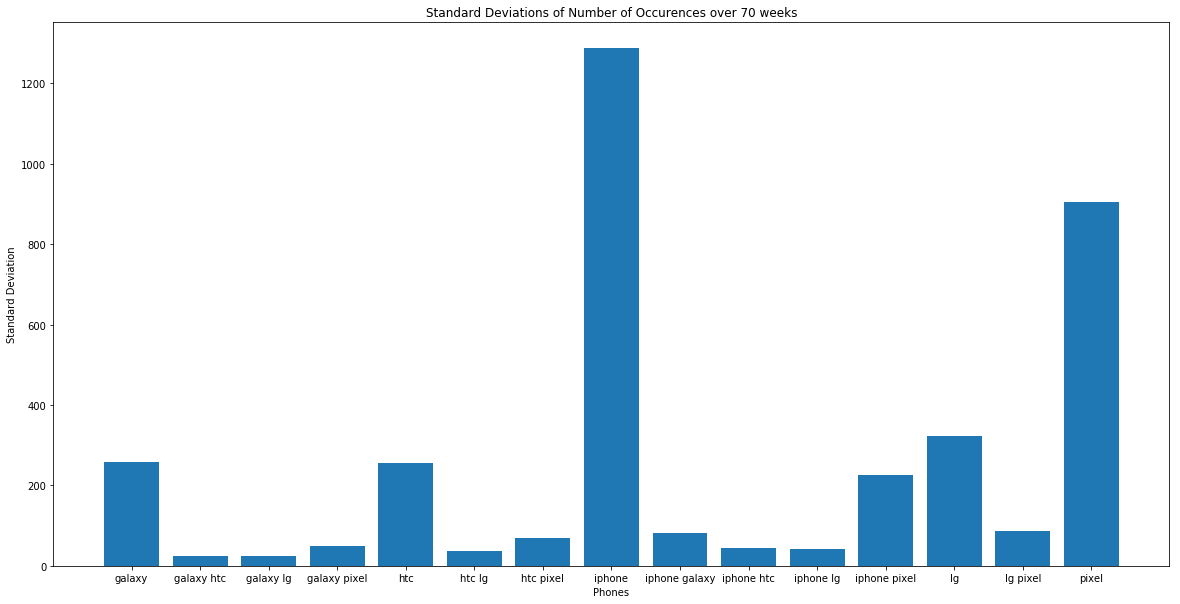

In [54]:
plt.figure(figsize=(20,10))
plt.bar(r_cols, r_stds)
plt.ylabel('Standard Deviation')
plt.xlabel("Phones")
plt.title("Standard Deviations of Number of Occurences over 70 weeks")
plt.savefig("reddit_col_stds_bar.jpg")
plt.show()

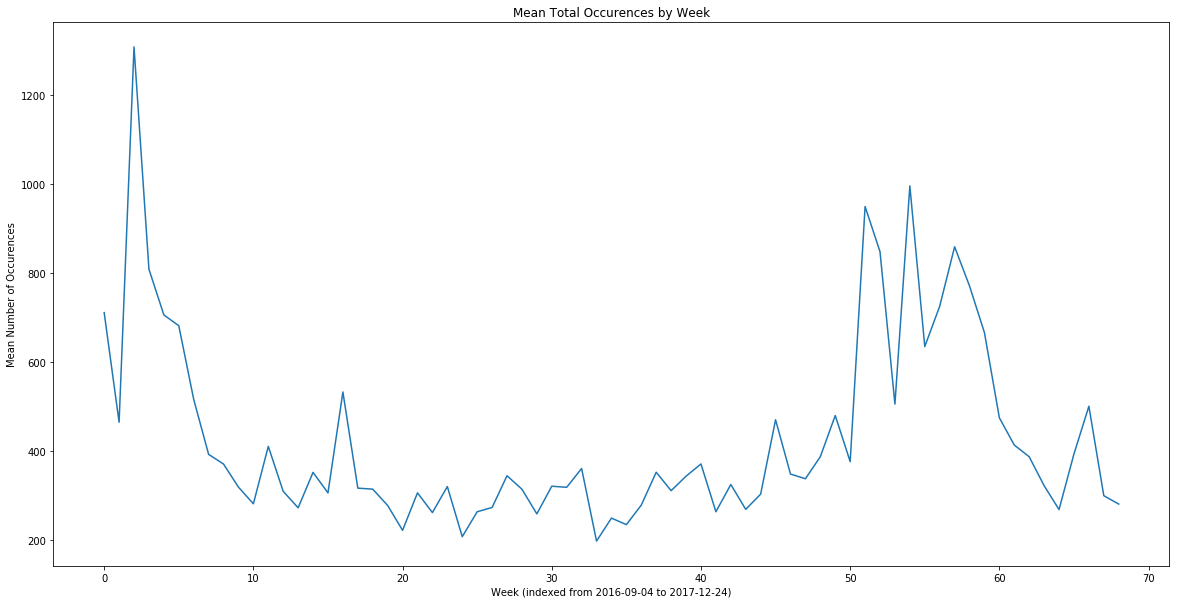

In [59]:
plt.figure(figsize=(20,10))
plt.plot(week_inds, total_week_means)
plt.ylabel("Mean Number of Occurences")
plt.xlabel("Week (indexed from 2016-09-04 to 2017-12-24)")
plt.title('Mean Total Occurences by Week')
plt.savefig("reddit_total_means_linechart.jpg")
plt.show()

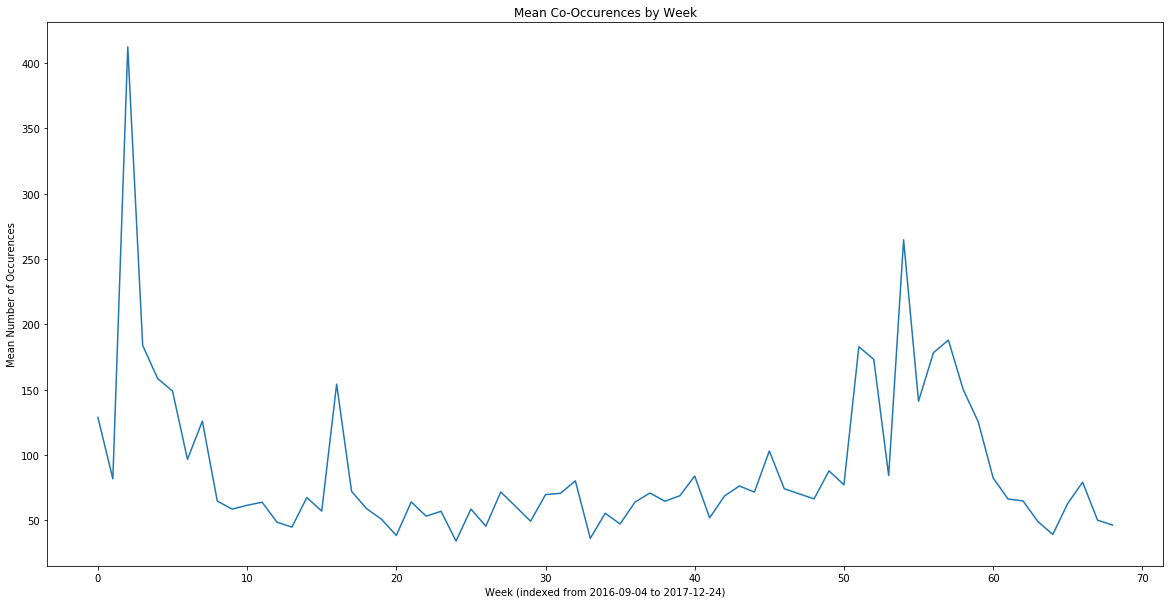

In [58]:
plt.figure(figsize=(20,10))
plt.plot(week_inds, co_week_means)
plt.ylabel("Mean Number of Occurences")
plt.xlabel("Week (indexed from 2016-09-04 to 2017-12-24)")
plt.title('Mean Co-Occurences by Week')
plt.savefig("reddit_co_means_linechart.jpg")
plt.show()

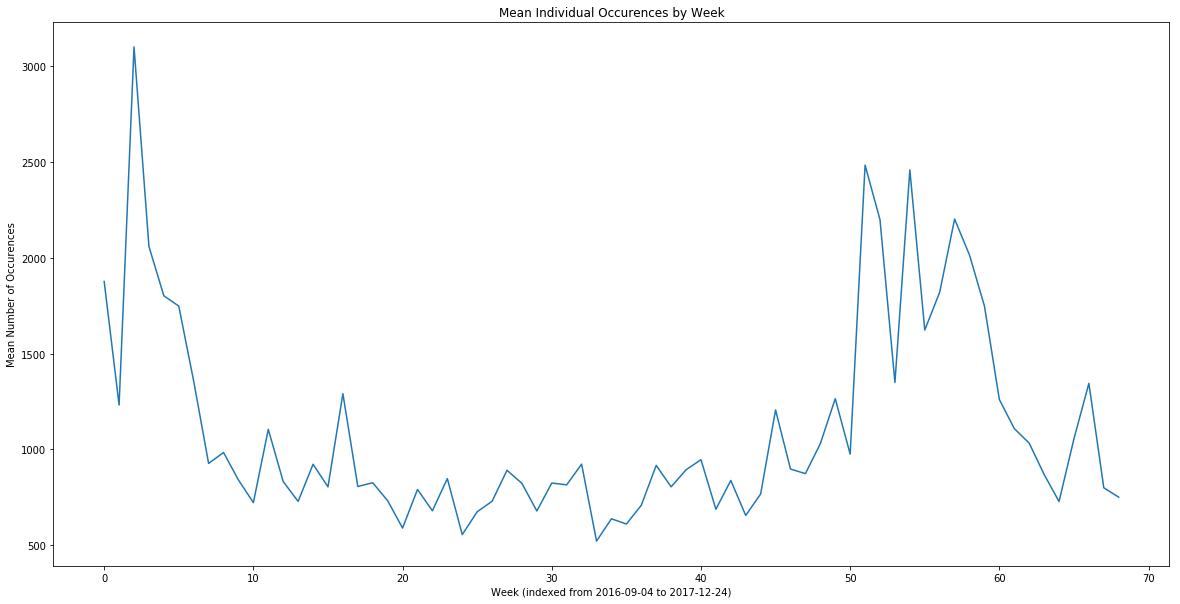

In [57]:
plt.figure(figsize=(20,10))
plt.plot(week_inds, ind_week_means)
plt.ylabel("Mean Number of Occurences")
plt.xlabel("Week (indexed from 2016-09-04 to 2017-12-24)")
plt.title('Mean Individual Occurences by Week')
plt.savefig("reddit_ind_means_linechart.jpg")
plt.show()

In [50]:
phone_stats = pd.DataFrame(data=np.zeros((2, 15)), columns=r_cols, index=['Mean', 'Std'])
phone_stats.loc['Mean'] = r_means
phone_stats.loc['Std'] = r_stds
phone_stats.head()
phone_stats.to_excel("reddit_stats_by_phone.xlsx")
phone_stats.to_csv("reddit_stats_by_phone.csv")
phone_stats.head()

In [51]:
week_stats = pd.DataFrame(data=np.zeros((69, 6)), columns=['Total Mean', 'Total Std', 'Co Mean', 'Co Std', 'Ind Mean', 'Ind Std'], index=reddit.index)
week_stats['Total Mean'] = total_week_means
week_stats['Total Std'] = total_week_std
week_stats['Co Mean'] = co_week_means
week_stats['Co Std'] = co_week_std
week_stats['Ind Mean'] = ind_week_means
week_stats['Ind Std'] = ind_week_std
week_stats.to_excel("reddit_stats_by_week.xlsx")
week_stats.to_csv("reddit_stats_by_week.csv")
week_stats.head()

,Total Mean,Total Std,Co Mean,Co Std,Ind Mean,Ind Std
Date,,,,,,
2016-09-04,711.266667,1320.645106,128.7,98.727515,1876.4,1880.705134
2016-09-11,464.866667,827.327010,81.7,44.885162,1231.2,1135.775814
2016-09-18,1308.466667,1772.355328,412.4,434.608176,3100.6,2132.450773
2016-09-25,808.866667,1150.476663,183.8,147.032725,2059.0,1285.936818
2016-10-02,706.133333,1122.944526,158.5,183.875109,1801.4,1445.052179
